## <center> Pré-processamento

### Importando Bibliotecas

In [38]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split   
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from category_encoders import OneHotEncoder
from sklearn.pipeline import Pipeline
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
import os
os.getcwd()

'c:\\Users\\JPCONCEICAO\\OneDrive - Suzano S A\\Coding\\PROJETO_RECOMENDADOR_CLONAL\\notebooks'

In [3]:
# Importando funções locais
import sys
import os

# Adiciona o caminho da pasta 'scripts' ao sys.path
sys.path.append(os.path.abspath('../pipelines'))

import pre_processor #Funções locais

### Importando dados

Listando as tabelas dentro do .db

In [4]:
from sqlalchemy import create_engine, inspect

# Localizando o banco de dados
caminho_arquivo_db = '..\\data\\pre_processed\\pos_eda.db'

# Criando a engine
engine = create_engine(f'sqlite:///{caminho_arquivo_db}')

# Criando um inspetor
inspetor = inspect(engine)

# Listando os nomes das tabelas
tabelas = inspetor.get_table_names()

# Exibindo os nomes das tabelas
for tabela in tabelas:
    print(tabela)

df_prod


In [5]:
# Carregando as tabelas em DataFrames
df = pd.read_sql('df_prod', con=engine)
# Converter cada nome de coluna para string - Necessário futuramente para as pipelines
df.columns = [str(col) for col in df.columns]

In [6]:
df.drop(columns=['index'], inplace=True)

In [7]:
df.head()

,Volume,Região,Material Genético,Densidade,Altitude,Espaçamento,Id Floresta,Manejo Atual,Município,Zona Climática,(%) Mortas,(%) Falhas,avg_vol/ha
0,3688.15,MA,SUZMA2019,495.66,212.0,INDEFINIDO,5.79,REFORMA,ESTREITO,M5,0.00,0.00,116.418876
1,5088.81,MA,SUZMA2019,496.07,208.0,300X330,5.70,CONDUÇÃO,ESTREITO,M5,0.00,0.00,99.761027
2,4404.00,MA,SUZMA2019,490.86,187.0,300X330,5.70,CONDUÇÃO,ESTREITO,M5,0.00,0.00,91.788245
3,4228.73,MA,SUZMA2019,513.60,218.0,300X330,5.02,CONDUÇÃO,ESTREITO,M5,0.04,0.00,121.690072
4,6490.57,MA,SUZMA2025,559.88,232.0,300X330,5.03,CONDUÇÃO,ESTREITO,M5,0.07,0.02,129.941341


Avaliando Cardinalidade das colunas com dados object

In [8]:
# Iterando sobre cada coluna do tipo 'object'
for col in df.select_dtypes(include='object').columns:
    print(f"Coluna: {col}")
    print(f'Quantidade de valores únicos nessa coluna: {df[col].nunique()}')
    print(df[col].value_counts())
    print("\n" + "-"*50 + "\n")


Coluna: Região
Quantidade de valores únicos nessa coluna: 3
Região
MA    818
PA    362
TO    261
Name: count, dtype: int64

--------------------------------------------------

Coluna: Material Genético
Quantidade de valores únicos nessa coluna: 60
Material Genético
SUZMA2019    332
SUZA0562     144
AEC0144      136
SUZA0385     117
SUZA1250     111
CO1355        71
BA6021        57
AEC1528       53
SUZBA1922     43
VCC975        37
SUZA1253      35
SUZA0217      33
CO1407        32
SUZA0407      32
SUZA1265      23
AEC0224       18
PESQUISA      17
SUZA1099      16
VES0021       12
SUZBA1083     11
VE41          10
SUZA1135       9
AMC08          8
CO1423         7
SUZA1981       6
SUZA1958       6
SUZMA2025      5
SUZSP1002      5
VCC865         4
IPB2           3
VES0032        3
SUZA1712       3
CO0321         3
GG100          3
EUR            2
SUZMA2037      2
CO1404         2
BA7340         2
GER0680        2
SUZMA2049      2
SUZMA2022      2
IPB1           2
SUZA0540       2
AEC

Feature Engineering p.II

In [9]:
# Transformando coluna de espaçamento para Nº de Arv/Ha
# Considerações, caso haja erro, considerar a moda (espaçamento mais comum)
pre_processor.calcular_arvores_por_ha(df, 'Espaçamento')

In [10]:
df.head(2)

,Volume,Região,Material Genético,Densidade,Altitude,arv/ha,Id Floresta,Manejo Atual,Município,Zona Climática,(%) Mortas,(%) Falhas,avg_vol/ha
0,3688.15,MA,SUZMA2019,495.66,212.0,1111,5.79,REFORMA,ESTREITO,M5,0.0,0.0,116.418876
1,5088.81,MA,SUZMA2019,496.07,208.0,1111,5.70,CONDUÇÃO,ESTREITO,M5,0.0,0.0,99.761027


Redução de cardinalidade

In [11]:
# Aplicando a função para transformar em "outro" todos o valores que ocorrem < 10 vezes.
train = pre_processor.substituir_valores_raros(df, limite=10, excluir_colunas=['Material Genético'])

In [12]:
# Iterando sobre cada coluna do tipo 'object'
for col in df.select_dtypes(include='object').columns:
    print(f"Coluna: {col}")
    print(f'Quantidade de valores únicos nessa coluna: {df[col].nunique()}')
    print(df[col].value_counts())
    print("\n" + "-"*50 + "\n")

Coluna: Região
Quantidade de valores únicos nessa coluna: 3
Região
MA    818
PA    362
TO    261
Name: count, dtype: int64

--------------------------------------------------

Coluna: Material Genético
Quantidade de valores únicos nessa coluna: 60
Material Genético
SUZMA2019    332
SUZA0562     144
AEC0144      136
SUZA0385     117
SUZA1250     111
CO1355        71
BA6021        57
AEC1528       53
SUZBA1922     43
VCC975        37
SUZA1253      35
SUZA0217      33
CO1407        32
SUZA0407      32
SUZA1265      23
AEC0224       18
PESQUISA      17
SUZA1099      16
VES0021       12
SUZBA1083     11
VE41          10
SUZA1135       9
AMC08          8
CO1423         7
SUZA1981       6
SUZA1958       6
SUZMA2025      5
SUZSP1002      5
VCC865         4
IPB2           3
VES0032        3
SUZA1712       3
CO0321         3
GG100          3
EUR            2
SUZMA2037      2
CO1404         2
BA7340         2
GER0680        2
SUZMA2049      2
SUZMA2022      2
IPB1           2
SUZA0540       2
AEC

Aplicando Pipeline para Remover outliers, aplicar o StandardScaler e, por fim, o one hot encoder.

In [13]:
# Importando funções locais
import sys
import os

# Adiciona o caminho da pasta 'scripts' ao sys.path
sys.path.append(os.path.abspath('../pipelines'))

from pre_processor import OutlierRemoverIQR

In [14]:
# Removendo outliers
outlier_remover = OutlierRemoverIQR()
df = outlier_remover.fit_transform(df)

In [21]:
df.head()

,Volume,Região,Material Genético,Densidade,Altitude,arv/ha,Id Floresta,Manejo Atual,Município,Zona Climática,(%) Mortas,(%) Falhas,avg_vol/ha
0,3688.15,MA,SUZMA2019,495.66,212.0,1111,5.79,REFORMA,ESTREITO,M5,0.00,0.00,116.418876
1,5088.81,MA,SUZMA2019,496.07,208.0,1111,5.70,CONDUÇÃO,ESTREITO,M5,0.00,0.00,99.761027
2,4404.00,MA,SUZMA2019,490.86,187.0,1111,5.70,CONDUÇÃO,ESTREITO,M5,0.00,0.00,91.788245
3,4228.73,MA,SUZMA2019,513.60,218.0,1111,5.02,CONDUÇÃO,ESTREITO,M5,0.04,0.00,121.690072
4,6490.57,MA,SUZMA2025,559.88,232.0,1111,5.03,CONDUÇÃO,ESTREITO,M5,0.07,0.02,129.941341


#### Avaliação de Multicolinearidade: Identificação e possível remoção de variáveis altamente correlacionadas.

Avaliar esse quesito é importante já que:
- Dificulta a interpretação dos coeficientes;
- Reduz a capacidade preditiva: Overfitting;
- Atrapalha na identificação da influência individual de variáveis, pois 'dizem a mesma coisa' para o modelo;
- Dentre outros problemas.

In [30]:
# Função para filtrar e visualizar correlação
def filtrar_e_visualizar_correlacao(df, threshold, drop_column = None):

    # Calcula a matriz de correlação
    corr = df.corr()
    
    # Aplica os filtros de limiar, excluindo a correlação perfeita
    filtro = (abs(corr) >= threshold) & (corr != 1.0)
    df_filtrado = corr.where(filtro).dropna(how = 'all').dropna(axis = 1, how = 'all')
    
    # Remove a coluna e linha especificada, se fornecido
    if drop_column:
        df_filtrado = df_filtrado.drop(index = drop_column, 
                                       errors = 'ignore').drop(columns = drop_column, 
                                                               errors = 'ignore')
    
    # Visualiza o resultado com um heatmap somente com as variáveis que satisfazem o critério de filtro
    plt.figure()
    sns.heatmap(df_filtrado, annot = True, cmap = 'coolwarm', center = 0)
    plt.show()

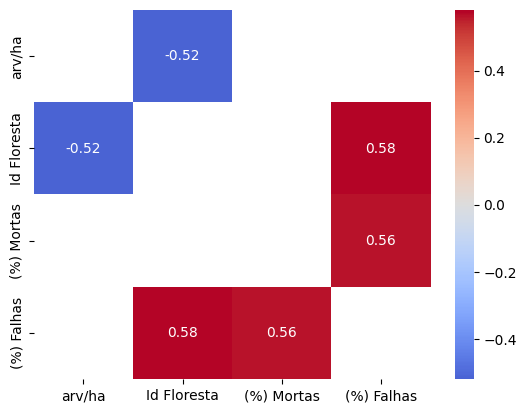

In [44]:
# Verificar quais variáveis podem apresentar multicolinearidade através da correlação - utilizaremos 0.6 como limiar
filtrar_e_visualizar_correlacao(df[numeric_features], threshold=0.5, drop_column = None) # 

Podemos observar que as mais altas correlações estão dentro do aceitável.

Multicolinearidade - Fator de Inflação da Variância (VIF)

In [45]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [47]:
# Filtrar apenas as colunas numéricas
df_numeric = df.select_dtypes(include=[np.number])

# Adicionar uma constante (termo de interceptação) ao DataFrame
df_with_constant = add_constant(df_numeric)

# Calcular o VIF para cada variável
vif_data = pd.DataFrame()
vif_data["Variable"] = df_with_constant.columns
vif_data["VIF"] = [variance_inflation_factor(df_with_constant.values, i) for i in range(df_with_constant.shape[1])]

# Exibir os resultados
print(vif_data)


      Variable         VIF
0        const  631.743815
1       Volume    1.273820
2    Densidade    1.219416
3     Altitude    1.274536
4       arv/ha    1.568079
5  Id Floresta    1.937929
6   (%) Mortas    1.587384
7   (%) Falhas    1.854679
8   avg_vol/ha    1.150715


Considerações:

VIF ≈ 1: Nenhuma multicolinearidade <br>
1 < VIF ≤ 5: Multicolinearidade moderada. <br>
5 < VIF ≤ 10: Alta multicolinearidade. <br>
VIF > 10: Multicolinearidade muito alta.

Verificamos uma baixa multicolinearidade.

## Aplicando Scaler e encoder

In [55]:
X = df.drop(columns=['Material Genético'])  # Dados sem a variável alvo
y = df['Material Genético']  # Variável alvo

In [56]:
# Identificando colunas categóricas e numéricas
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
# Identificando colunas categóricas automaticamente
categorical_features = X.select_dtypes(include=['object']).columns

In [57]:
# Criando o pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [58]:
# Transformando os dados
X_processed = preprocessor.fit_transform(X)

In [61]:
# Transformando o array de volta em um DataFrame
X_processed_df = pd.DataFrame(X_processed, columns=numeric_features.tolist() + preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features).tolist())

In [63]:
X_processed_df.head()

,Volume,Densidade,Altitude,arv/ha,Id Floresta,(%) Mortas,(%) Falhas,avg_vol/ha,Região_1,Região_2,...,Zona Climática_1,Zona Climática_2,Zona Climática_3,Zona Climática_4,Zona Climática_5,Zona Climática_6,Zona Climática_7,Zona Climática_8,Zona Climática_9,Zona Climática_10
0,0.116328,0.553408,0.356265,0.466035,0.240573,0.000000,0.000000,0.051853,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.160899,0.555365,0.346437,0.466035,0.233786,0.000000,0.000000,0.044348,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.139107,0.530498,0.294840,0.466035,0.233786,0.000000,0.000000,0.040756,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.133530,0.639032,0.371007,0.466035,0.182504,0.000865,0.000000,0.054228,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.205505,0.859918,0.405405,0.466035,0.183258,0.001514,0.000269,0.057946,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Salvando dados prontos para consumo pelo modelo

In [65]:
# Salvando o DataFrame processado em um arquivo CSV
X_processed_df.to_csv('..\data\processed\X_final.csv', index=False)

In [66]:
# Salvando a variável alvo separadamente (opcional)
y.to_csv('..\data\processed\y_final.csv', index=False)